
# Project: Movies Data Analysis - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project aims to investigate the movies dataset collected by TMDB. The dataset contains information on the title, cast, tagline, rating, release date, budget and revenue of the movies.

The columns included in the dataset are as follows:
id - each movie has a unique id given by tmdb that can be used to identify it.

imdb_id - same description as above, but this id is given by imdb rather than tmdb

popularity - this columns measures how popular a movie is. It is based on factors such as the number of votes and views the movie gets per day, as well as the number of users who add it to their watchlist or mark it as favorite. 

budget - this column basically represents the production cost. That is, an estimate of how much it costs to produce the movie. 

revenue - this represent how much the movie makes in terms of the ticket sales.

original_title - this is the name of the movie. 

cast - This is a list of the first 5 actors ordered according to how they appear in the credits. 

homepage - this is the url of the movie website 

director - this shows the name of the director of the movie 

tagline - this is a slogan/statement that is printed on the poster of the movie to advertise the movie to the public. 

keywords - a word/words attached to a title to describe any notable concept, style or action that takes place during the movie.

overview - this is a brief summary of the plot of the movie 

runtime - this is duration of the movie measures in minutes.

genres - these are the categories under which a movie can be placed.

production_companies - these are companies that undertake movie projects.  

release_date - this is the date a movie was released 

vote_count - this is the number of people that voted/rated a movie 

vote_average - this is the basically the rating a movie got on the average(this uses a weighted average) 

release_year - this is the year a movie was released 

budget_adj - this is production cost of a movie, adjusted for inflation taking 2010 as the base year

revenue_adj - this is how much a movie earned, adjusted for inflation taking 2010 as the base year.


### Question(s) for Analysis

#### What is the relationship between movie popularity, rating and revenue?
#### What is the relationship between Revenue and Budget?
#### What genre and cast are the most popular?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
movies_df = pd.read_csv('tmdb-movies.csv')  #To load the movies dataset
movies_df.head()   #to view the first 5 rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies_df.shape  #to view the number of rows and columns contained in the dataset

(10866, 21)

In [5]:
movies_df.info() # to get a more generalized overview of the dataset in terms of shape, datatypes and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### From the info printed above, we can see that the homepage column has a lot of missing values, while the tagline, keywords and production_companies columns have a considerable amount of missing values. lastly, the cast, director, overview, runtime and genres columns also have few missing columns.

#### Some of the rows mentioned above will be dropped from the dataset as they will not be used in the analysis anyways. 

In [6]:
movies_df.describe()  #to get the descriptive summary of the columns that contain numerical values

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### As can be seen from the descriptive statistics above,  about 50% of the revenue and budget columns contain zero value. Which we could not see when we used the .info() method earlier, because '0' was regarded as a value. Further inspection will be made as to why they have zero values.

#### We see that most of the movies were released in 2001

#### Most movies got an averahe rating of 6.

#### We also notice that this dataset spans a period of over 55 years, since the earliest release year is 1960, and the latest release year is 2015.


In [7]:
movies_df.query('revenue == 0')  #to get the records where the revenue is zero

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


In [32]:
movies_df.query('budget == 0')  #to get the records where the budget is zero

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


#### After much investigation regarding why a movie will have zero budget or revenue, I found out by searching online that movies with zero budget are ones that are produced with little to no budget at all. I learnt actors and technicians volunteer for these kinds of movies and get no payment for the movies. The movies are mostly submitted to festivals to raise awareness and therefore they don't make any revenue. On the other hand, there are few movies that have budget but don't have revenue. My assumption is that those movies flopped. 


### Data Cleaning

#### As stated above, I will delete the columns I don't need for my analysis

#### Also, the cast column will be split into 5 columns so we can examine the impact of an actor on the movie.

In [8]:
movies_df.columns  # To get a list of the columns in the dataset

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
movies_df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

#### The following columns have been deleted from the dataset has they won't be used in answering the questions stated in the introduction of this analysis: 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'

In [10]:
movies_df.head() # To confirm that the columns have been deleted

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015


#### Let's check the dataset for null values.

In [11]:
movies_df.isnull().sum() #to check the whole dataset for null values

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

#### Let's do a quick inspection of the entries with null values. But before that, let's plot histograms of the columns to gain some insights.

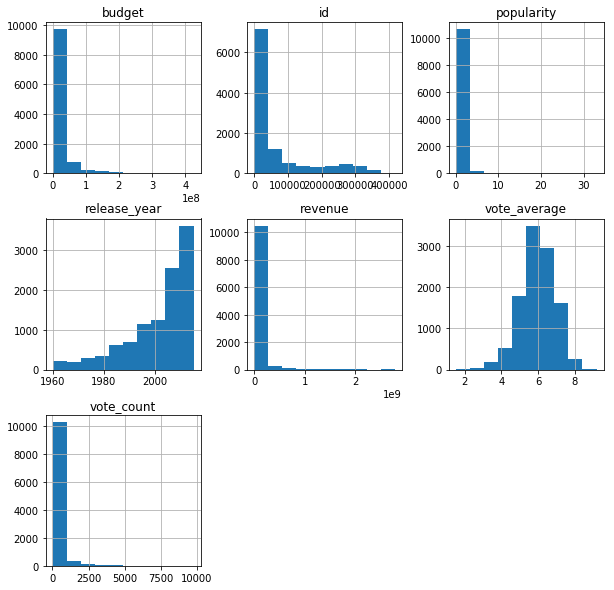

In [12]:
movies_df.hist(figsize=(10,10));  #To plot histograms of the dataframe

#### We can see that this agrees with the information we go from the descriptive statistics, majority of the budget and revenue have zero value, the average rating is 6 and so on. Let's now go ahead and look at the columns with null values.

In [13]:
movies_df[movies_df['cast'].isnull()]  

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,Animation,47,6.9,2015
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,Documentary,37,8.2,2015
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,Documentary,19,7.8,2015
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,Documentary,12,8.0,2015
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,Documentary,11,8.9,2015
587,319091,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,Documentary,39,7.8,2015
600,332479,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,Science Fiction|Action|Animation,29,7.6,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,13,5.0,2015
1088,169607,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,Documentary,70,7.8,2014
1173,261041,0.159037,0,0,The Search for General Tso,NaN,Ian Cheney,Documentary,14,6.9,2014


In [14]:
movies_df[movies_df['director'].isnull()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,Comedy,14,6.6,2015
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,Documentary|Science Fiction,12,7.5,2015
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,Comedy|Romance,14,6.5,2015
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,TV Movie|Documentary,32,6.3,2014
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,TV Movie|Documentary,11,7.2,2014
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,Documentary,40,7.0,2014
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,Romance|Music|Comedy,18,5.7,2014
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,Documentary,12,6.8,2014
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,Drama,19,7.5,2009
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,Drama|Family|Foreign,11,6.1,2009


In [15]:
movies_df[movies_df['genres'].isnull()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,NaN,21,6.1,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,13,5.0,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,13,6.8,2014
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,NaN,57,7.4,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,NaN,11,7.0,2009
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,12,5.8,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,11,7.7,2010
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,NaN,12,7.2,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,NaN,11,6.1,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,NaN,12,8.3,2012


#### As we can see, they are not numeric data that we can fill with the mean, forward fill or backfill. And since they are not many, we can just drop the rows from the dataset, as follows.

In [16]:
movies_df.dropna(axis=0, inplace=True) #To drop the rows with null values from the dataframe

In [17]:
movies_df.info()   #To confirm if the null values have been dropped.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
id                10732 non-null int64
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.1+ KB


#### We should ensure that the datatypes are correct, which they are. Another thing is to ensure that there are no duplicates in the dataframe

In [18]:
movies_df[movies_df.duplicated()]   #To get the duplicate entry

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010


#### We see that there is a duplicate entry in the dataframe. The next thing we should do is to delete the duplicate.

In [19]:
movies_df.drop_duplicates(inplace=True)    # To drop the duplicate entry

In [20]:
movies_df.shape    #To confirm that the duplicate has been dropped.

(10731, 11)

#### Lastly, we split the cast column into individual columns for each actor.

#### To do this, we first split the cast columns separately and then add it to the movies dataframe, after which we delete the initial cast columns

In [21]:
new_cast = movies_df['cast'].str.split('|', expand=True)   #To split the cast column that is separated by '|'
new_cast.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [22]:
#To add the separated cast columns in the movies dataframe

movies_df['cast1'] = new_cast[0]
movies_df['cast2'] = new_cast[1]
movies_df['cast3'] = new_cast[2]
movies_df['cast4'] = new_cast[3]
movies_df['cast5'] = new_cast[4]

In [48]:
movies_df.head()   #To confirm that the columns have been added to the movies dataframe

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,cast1,cast2,cast3,cast4,cast5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [23]:
movies_df.drop('cast', axis=1, inplace=True)    #To remove the initial cast column
movies_df.head()

,id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year,cast1,cast2,cast3,cast4,cast5
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
director          10731 non-null object
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
cast1             10731 non-null object
cast2             10594 non-null object
cast3             10510 non-null object
cast4             10404 non-null object
cast5             10095 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


#### As we can see from the last output, there are movies where the entry for second to fourth actors are null. We would ignore this and only concentrate on the impact the first cast has on the success of the movie.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What is the relationship between movie popularity, rating and revenue?)

In [25]:
top10_popular = movies_df.groupby(['original_title','release_year'])[['popularity']].sum().sort_values(by='popularity', ascending=False).head(10)
top10_popular

,,popularity
original_title,release_year,
Jurassic World,2015,32.985763
Mad Max: Fury Road,2015,28.419936
Interstellar,2014,24.949134
Guardians of the Galaxy,2014,14.311205
Insurgent,2015,13.112507
Captain America: The Winter Soldier,2014,12.971027
Star Wars,1977,12.037933
John Wick,2014,11.422751
Star Wars: The Force Awakens,2015,11.173104


In [27]:
def barchart(col, title, x_label, y_label):
    col.plot(kind='barh', fontsize=11, alpha=0.7, figsize=(6,6), color='b')
    plt.title(title, fontsize=20)
    plt.xlabel(x_label,fontsize=15)
    plt.ylabel(y_label, fontsize=15);

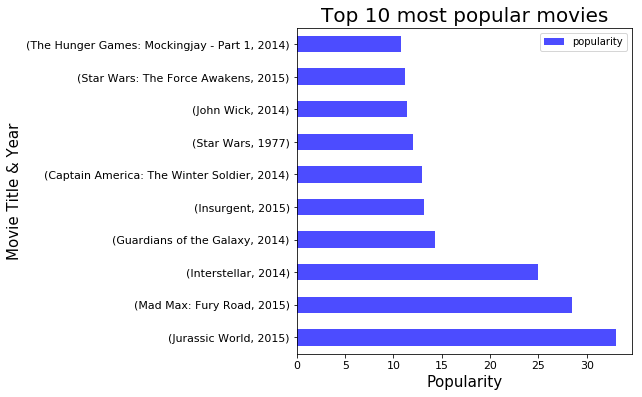

In [28]:
barchart(top10_popular, 'Top 10 most popular movies', 'Popularity', 'Movie Title & Year')

#### We can see from the above analysis, the top 10 most popular movies, the result shows that movies in 2014 were the most popular, followed by movies in 2015. One will wonder if popularity translated to higher rating. To know if it does, let's look at the highest rated movies.

In [32]:
top10_rated = movies_df.groupby(['original_title','release_year'])['vote_average'].sum().sort_values(ascending=False).head(10)
top10_rated

original_title                                                   release_year
Emma                                                             1996            13.1
1                                                                2013            12.7
Joan of Arc                                                      1999            11.9
The Story of Film: An Odyssey                                    2011             9.2
Black Mirror: White Christmas                                    2014             8.8
Pink Floyd: Pulse                                                2006             8.7
The Art of Flight                                                2011             8.5
Queen - Rock Montreal                                            1981             8.5
Dave Chappelle: Killin' Them Softly                              2000             8.5
A Personal Journey with Martin Scorsese Through American Movies  1995             8.5
Name: vote_average, dtype: float64

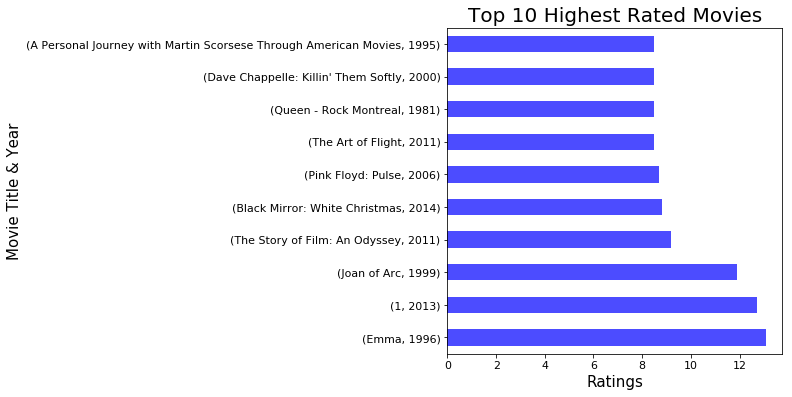

In [34]:
barchart(top10_rated, 'Top 10 Highest Rated Movies', 'Ratings', 'Movie Title & Year')

#### From the above analysis, we can see that the most popular movies don't always get the higher ratings. In fact, only 1 movie each in 2014 and 2015 made it to the top 10 rated movies, and those movies didn't make it to the top 10 most popular. One can therefore infer that there is no relationship between popularity and rating. But let's look at a scatter plot of popularity and rating to support our assertion.

In [29]:
def scatter(data, x_axis, y_axis):
    data.plot(kind='scatter', x=x_axis, y=y_axis);

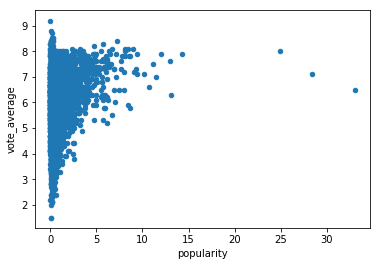

In [30]:
scatter(movies_df, 'popularity', 'vote_average')

In [35]:
movies_df['popularity'].corr(movies_df['vote_average'])

0.2179063121675627

#### As we can see from above, the scatter plot shows that there is little to no relationship between the rating and the popularity. This is also supported by the correlation coefficient in the cell above which shows a correlation of 22%, which is quite low.

#### What is we now want to know the top 10 revenue generating movies.

In [36]:
top10_revenue = movies_df.groupby(['original_title','release_year'])['revenue'].sum().sort_values(ascending=False).head(10)
top10_revenue

original_title                                release_year
Avatar                                        2009            2781505847
Star Wars: The Force Awakens                  2015            2068178225
Titanic                                       1997            1845034188
The Avengers                                  2012            1519557910
Jurassic World                                2015            1513528810
Furious 7                                     2015            1506249360
Avengers: Age of Ultron                       2015            1405035767
Harry Potter and the Deathly Hallows: Part 2  2011            1327817822
Frozen                                        2013            1274219009
Iron Man 3                                    2013            1215439994
Name: revenue, dtype: int64

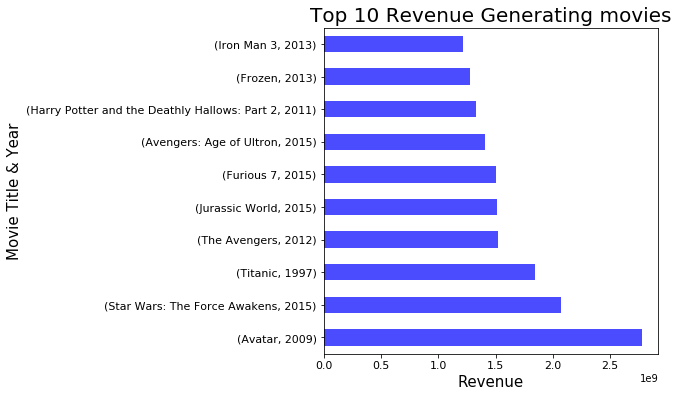

In [37]:
barchart(top10_revenue, 'Top 10 Revenue Generating movies', 'Revenue', 'Movie Title & Year')

#### This actually shows that a movie in 2009, which didn't make the top 10 popularity list is the highest revenue generating movie. #### Does this mean that popular movies don't generate high revenues? 
#### This may not be the case, as we can see that two of the movies that made the top 10 popularity list also generated high revenue.
#### But this definitely doesn't say much about the relationship between popularity and revenue. This, we need to examine them.

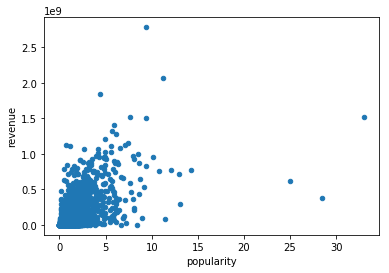

In [38]:
scatter(movies_df, 'popularity', 'revenue');

In [122]:
movies_df['popularity'].corr(movies_df['revenue'])

0.66284312207682339

#### The correlation coefficient tells us that there is actually a significant relationship between Popularity and Revenue with a correlation coefficient of 66%

### Research Question 2  (What is the relationship between Revenue and Budget?)

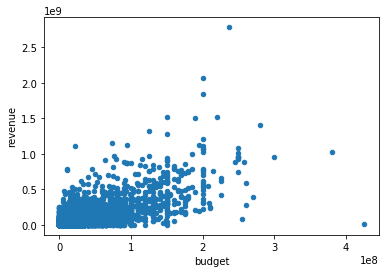

In [39]:
scatter(movies_df, 'budget', 'revenue');

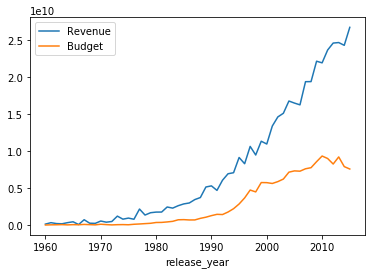

In [41]:
revenue_by_year = movies_df.groupby(['release_year'])['revenue'].sum()
budget_by_year = movies_df.groupby(['release_year'])['budget'].sum()
revenue_by_year.plot(kind='line')
budget_by_year.plot(kind='line')
plt.legend(['Revenue', 'Budget']);

In [42]:
movies_df['budget'].corr(movies_df['revenue'])

0.73448736240523549

#### The correlation coefficient and the scatter plot shows that there is a strong positive relationship between budget and revenue. But While this relationship exists between the two, we see that Revenue has been increasing over the years, while budget on the other has started declining from 2011 onwards.

### Research Question 3  (What genre and cast are the most popular?)

In [43]:
top_genres = movies_df.groupby('genres')['popularity'].sum().sort_values(ascending=False).head(10)
top_genres

genres
Comedy                  374.732438
Drama                   360.824954
Drama|Romance           161.440368
Comedy|Romance          159.028582
Comedy|Drama            134.092834
Horror|Thriller         128.083537
Comedy|Drama|Romance    125.524195
Horror                   93.533052
Action|Thriller          88.709717
Animation|Family         77.556558
Name: popularity, dtype: float64

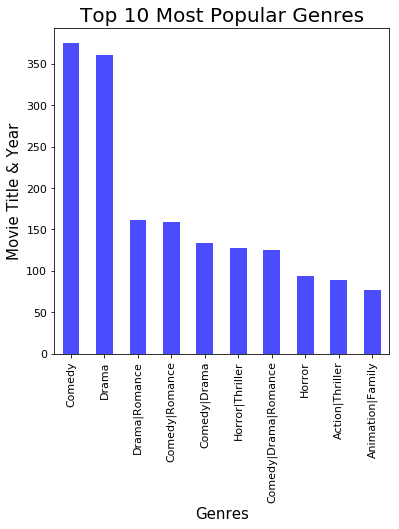

In [44]:
top_genres.plot(kind='bar', fontsize=11, alpha=0.7, figsize=(6,6), color='b')
plt.title('Top 10 Most Popular Genres', fontsize=20)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Movie Title & Year', fontsize=15);

In [45]:
movies_df.groupby(['cast1'])['popularity'].sum().sort_values(ascending=False).head(10)

cast1
Johnny Depp              61.384646
Tom Hanks                59.178106
Keanu Reeves             53.496470
Tom Cruise               52.625912
Arnold Schwarzenegger    52.006352
Daniel Radcliffe         50.771722
Bruce Willis             49.903355
Nicolas Cage             49.824734
Leonardo DiCaprio        49.204133
Chris Pratt              47.296968
Name: popularity, dtype: float64

<a id='conclusions'></a>
## Conclusions

### The following are the conclusions drawn from the analysis

#### 1. There is no significant relationship between the popularity and the rating of movies. Though we found a significant relationship between the popularity and the revenue generated by the movies

#### 2. We also found that there is a strong positive relationship between the movies budget and the revenue generated.

#### 3. We found that movies in 2014 and 2015 are the most popular, however movies 5 movies in 2015 were among the top generating movies

#### 4. Lastly we found that comedy was the most popular genre, while Johnny Depp was the most popular cast.

### A major Limitation to my analysis is the fact that many movies had zero budget and revenue, though an explanation was given for that, it's hard to believe that many movies are independently produced.



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0